In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold, activation='step'):
        self.weights = weights    # weights
        self.threshold = threshold    # threshold
        self.activation = activation  # activation function

    def model(self, x):
        net_input = np.dot(self.weights, x)
        if self.activation == 'step':
            return 1 if net_input >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-net_input))
        elif self.activation == 'relu':
            return 0 if net_input < self.threshold else 1
        else:
            raise ValueError('Unknown activation function')

def Area(x, y, activation='step'):
    neur1 = McCulloch_Pitts_neuron([2, -1], 2, activation)  # for y < 2x - 2
    neur2 = McCulloch_Pitts_neuron([-2, -1], -6, activation)  # for y < -2x + 6
    neur3 = McCulloch_Pitts_neuron([0, 1], 0, activation)  # for y > 0

    # get outputs of the neurons
    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))

    if activation == 'sigmoid':
        z1 = 1 if z1 >= 0.45 else 0
        z2 = 1 if z2 >= 0.45 else 0

    final_neuron_threshold = 2 if activation == 'sigmoid' else 3
    final_neuron = McCulloch_Pitts_neuron([1, 1, 1], final_neuron_threshold, activation)
    z_final = final_neuron.model(np.array([z1, z2, z3]))

    if activation == 'sigmoid':
        return 1 if z_final >= 0.45 else 0
    elif activation == 'relu':
        return z_final
    else:
        return z_final

In [ ]:
num_points = 1000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

red_points = []
green_points = []

for i in range(num_points):
    z_value = Area(x_values[i], y_values[i])
    if z_value == 0:  # z value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z value is 1
        green_points.append((x_values[i], y_values[i]))


red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

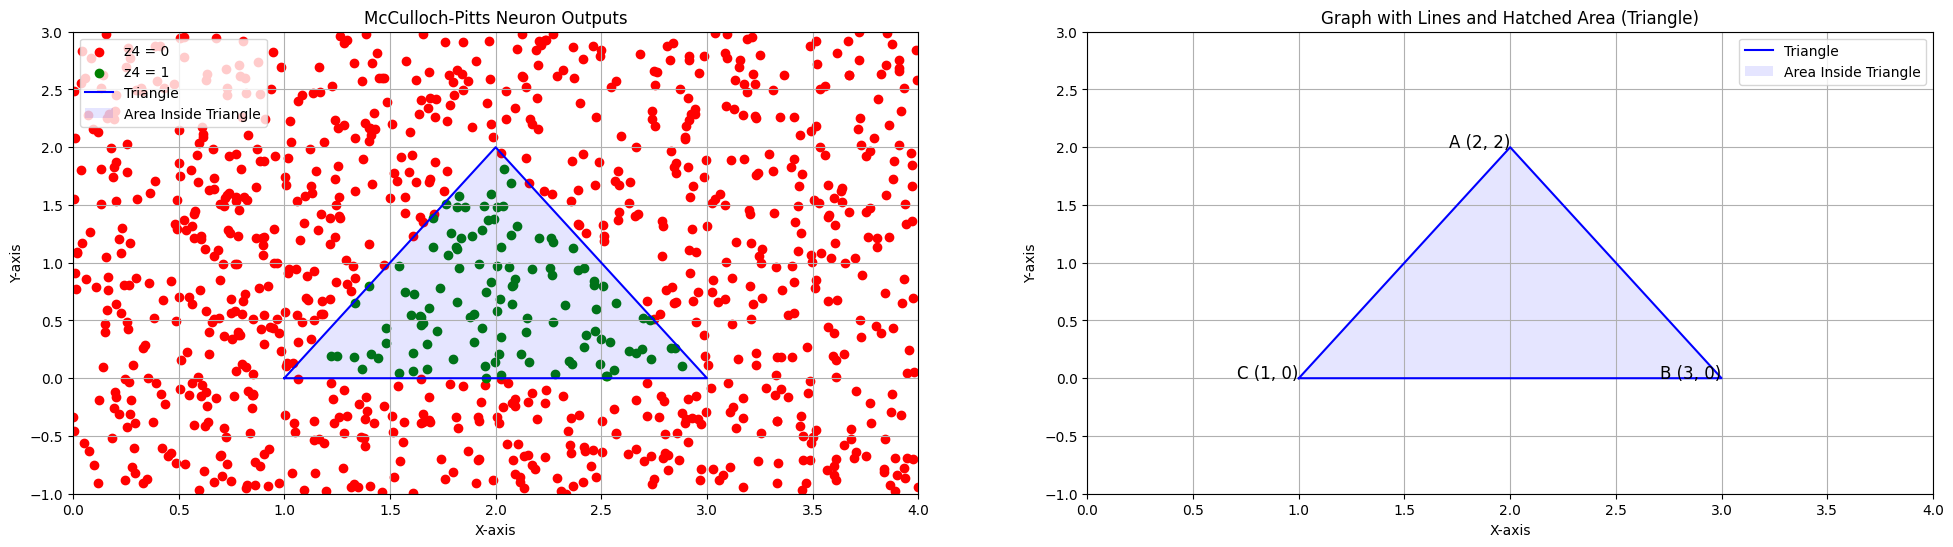

In [ ]:
# Plotting
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.scatter(red_x, red_y, color='red', label='z4 = 0') #using the outputs of neurons to plot (red points)
plt.scatter(green_x, green_y, color='green', label='z4 = 1') #using the outputs of neurons to plot (green points)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.grid(True)

# Triangle boundaries
triangle = np.array([[1, 0], [2, 2], [3, 0], [1, 0]])
plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Triangle')
plt.fill(triangle[:, 0], triangle[:, 1], 'b', alpha=0.1, label='Area Inside Triangle')

plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Triangle')
plt.fill(triangle[:, 0], triangle[:, 1], 'b', alpha=0.1, label='Area Inside Triangle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph with Lines and Hatched Area (Triangle)')
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.grid(True)

# Annotate points A, B, and C
plt.text(2, 2, 'A (2, 2)', fontsize=12, ha='right')
plt.text(3, 0, 'B (3, 0)', fontsize=12, ha='right')
plt.text(1, 0, 'C (1, 0)', fontsize=12, ha='right')

plt.legend(loc='upper right')

plt.show()

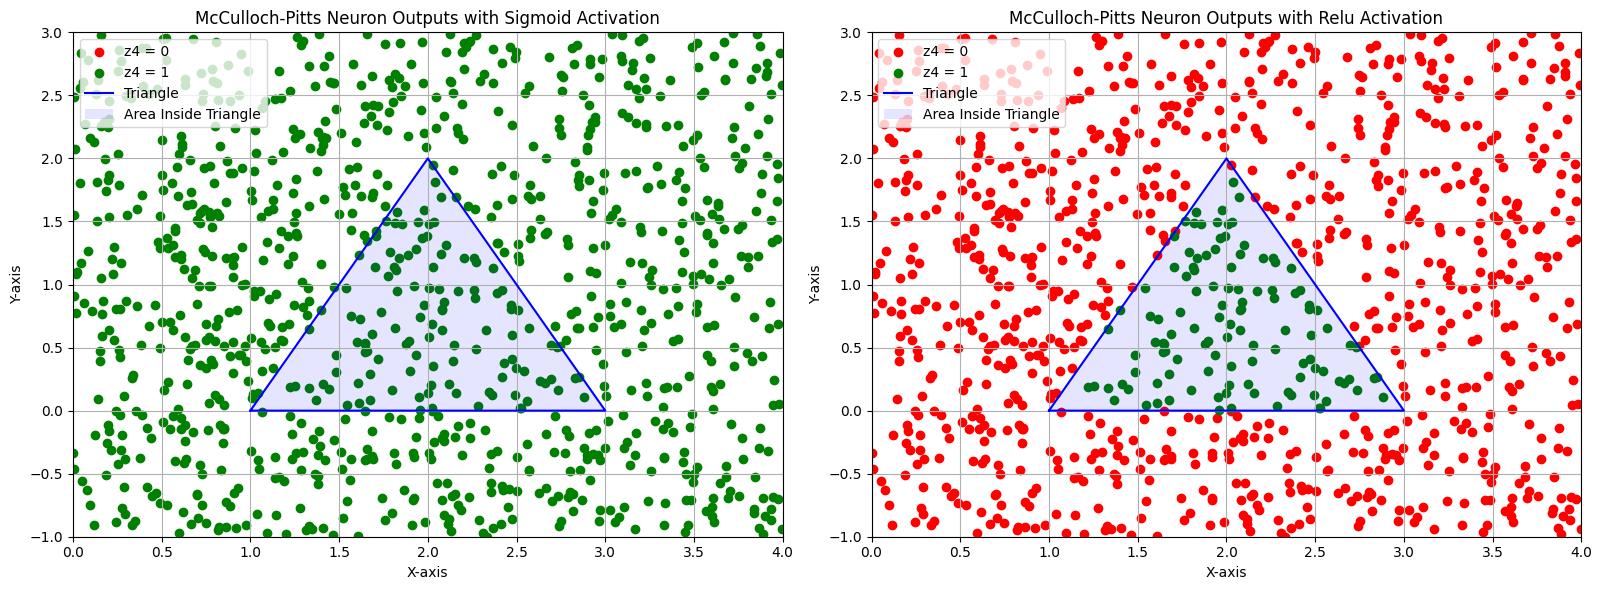

In [ ]:
def classify_points(activation):
    red_points = []
    green_points = []

    for i in range(num_points):
        z_value = Area(x_values[i], y_values[i], activation)
        if z_value == 0:  # z value is 0
            red_points.append((x_values[i], y_values[i]))
        else:  # z value is 1
            green_points.append((x_values[i], y_values[i]))

    return red_points, green_points

# Classify points for different activations
activations = ['sigmoid', 'relu']
results = {}

for activation in activations:
    results[activation] = classify_points(activation)

# Plotting
plt.figure(figsize=(24, 6))

for i, activation in enumerate(activations):
    red_points, green_points = results[activation]
    if red_points:
        red_x, red_y = zip(*red_points)
    else:
        red_x, red_y = [], []
    if green_points:
        green_x, green_y = zip(*green_points)
    else:
        green_x, green_y = [], []

    plt.subplot(1, 3, i + 1)
    plt.scatter(red_x, red_y, color='red', label='z4 = 0')
    plt.scatter(green_x, green_y, color='green', label='z4 = 1')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation.capitalize()} Activation')
    plt.xlim(0, 4)
    plt.ylim(-1, 3)
    plt.grid(True)

    # Triangle boundaries
    triangle = np.array([[1, 0], [2, 2], [3, 0], [1, 0]])
    plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Triangle')
    plt.fill(triangle[:, 0], triangle[:, 1], 'b', alpha=0.1, label='Area Inside Triangle')

    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()